# Файлы и потоки

Если данных много, их хранят в файле, а не вводят руками с консоли. Нужно уметь обрабатывать много данных из файла и читать и писать в файл.

С каждой запущенной программой связаны по умолчанию 3 потока данных. Можно открыть другие потоки, связав их с файлом:
![stdin](https://stepik.org/media/attachments/lesson/265319/stdio.svg)

У каждой программе при запуске есть 3 потока: стандартный поток ввода **stdin**, стандартный поток вывода **stdout** и стандартный поток сообщений об ошибках **stderr**.

* **stdin** - в него попадают данные, которые мы вводим с клавиатуры или перенаправляем в программу с помощью `<` в командной строке. С него читает функция **input()**.
* **stdout** - выводится на экран. В него печатает **print**.
* **stderr** - тоже выводится на экран. В него печатают сообщения об ошибках (exception).

Переменные `stdin`, `stdout`, `stderr` определены в пакете `sys`.

Для закрытия потока stdin (говорим, что данные закончились) при вводе с клавиатуры используйте:

* **Ctrl+Z** на Windows
* **Ctrl+D** на Linux/Mac

Указать поток `stderr` при печати можно указав параметр `file`:

In [3]:
import sys
print('На stdout')
print('Ошибка', file=sys.stderr)

На stdout


Ошибка


## Открыть файл

Открыть поток, связанный с файлом. 

**open** (path, mode='r', buffering=None, encoding=None, errors=None, newline=None, closefd=True)

[документация](https://docs-python.ru/tutorial/vstroennye-funktsii-interpretatora-python/funktsija-open/)

* path - путь к файлу (более сложные случаи - см. pathlib)
    * `'/home/taty/work/example.py'`
    * `'C:\\Users\\natasha\\task.py'`
    * `r'C:\Users\natasha\task.py'`

* mode - как отрывать файл (чтени, запись, добавление)

| Мода | Как открывает |
|-|---|
| 'r' | открытие на чтение (является значением по умолчанию). | 
| 'w' | открытие на запись, содержимое файла удаляется, если файла не существует, создается новый. | 
| 'x' | открытие на запись, если файла не существует, иначе исключение. | 
| 'a' | открытие на запись, информация добавляется в конец файла. | 
| 'b' | открытие в двоичном режиме. | 
| 't' | открытие в текстовом режиме (является значением по умолчанию). | 
| '+' | открытие на чтение и запись | 

#### Открыть файл на запись, только если такого файла нет

Не хотим испортить уже существующий файл. Хотим открывать только новый. 

Использовать 'x' вместо 'w' в режиме открытия файла.

### Надо закрывать файлы

Если вы прочитали файл, то его нужно **обязательно закрыть**. Закрываем методом file.**close()**.

## Читаем файл

Подробнее методы разберем позже, когда научимся правильно открывать и закрывать файлы. Сейчас сводная таблица.

file в таблице ниже - это открытый нужным образом поток.

| Метод | Что делает |
|----|----|
| file.**read()** | прочитать и вернуть весь файл |
| file.**read(1)** | прочитать и вернуть 1 байт |
| file.**readline()** | прочитать и вернуть 1 строку |
| **next**(file) | прочитать и вернуть 1 строку |
| file.**readlines()** | прочитать и вернуть все строки |
| **list**(file) | прочитать все строки и вернуть список строк |

### файл - итератор, можно перебрать в for

```python
for line in sys.stdin:
    print(line)
```

Если читаем из `sys.stdin`, то закрыть поток с клавиатуры можно нажав клавиши

| Клавиши | OC |
|----|----|
| Ctrl+Z | Windows |
| Ctrl+D | Linux, Mac, итп |

In [46]:
# вот так делать не нужно, хотя кажется, что работает
file = open(r'data\text.txt', 'r', encoding='utf-8')
text = file.read()
file.close()

print(text)

Маленькой елочке
Холодно зимой.
Из лесу елочку
Взяли мы домой.



## with .. as - контекстный менеджер

In [2]:
# вот так правильно:
with open(r'data\text.txt', 'r', encoding='utf-8') as file:
    text = file.read()
print(text)

Маленькой елочке
Холодно зимой.
Из лесу елочку
Взяли мы домой.



В чем разница между open/close и with..as, где закопаны грабли?

* Программисты иногда забывают закрывать файлы. Это плохо.* 
Если пока мы пишем произошла в программе ошибка, то программа закончит работать, но сама файл не закроет. Придется писать специальный код, чтобы обрабатывать ошибки. Это сложно.

### один файл на чтение, второй файл на запись

In [11]:
with open('data/text.txt', 'r', encoding='utf-8') as fin, open('data/muuur.txt', 'w', encoding='utf-8') as fout:
    for line in fin:
        print('Мур, '+line, file=fout, end='')

## Если файла нет?

Какие еще ошибки могут быть при чтении файла? Об этом позже, когда будем говорить про исключения.

In [12]:
with open(r'data\флываоывжа.txt', 'r', encoding='utf-8') as file:
    text = file.read()
print(text)

FileNotFoundError: [Errno 2] No such file or directory: 'data\\флываоывжа.txt'

## Блок try - except

Попробуем поймать исключение. Ключевые слова **try** и **except**.

In [5]:
def foo(a):
    x = 5 / a
    print(x, a)

try:    
    foo(5)
    foo(0)      # на 0 делить нельзя
    foo(7)
except ZeroDivisionError as e:
    print('Поймали исключение!')
    
print('После блока обработки исключений')

1.0 5
Поймали исключение!
После блока обработки исключений


Как пошагово выполняется программа. Куда передается управление.

Видим, что при поимке исключения, программа может выполняться дальше.

`foo(7)` - не выполняется, так как это блок `try` - то что нужно выполнить до первого исключения.

`print('После блока обработки исключений')` - программа работает дальше, после окончания try-except блока.

## Как работает перехват исключений

* Вначале выполняется код, находящийся между операторами try и except.
* Если в ходе его выполнения исключения не произошло, то код в блоке except пропускается, а код в блоке try выполняется весь до конца.
* Если исключение происходит, то выполнение в рамках блока try прерывается и выполняется код в блоке except. При этом для оператора except можно указать, какие исключения можно обрабатывать в нем. При возникновении исключения, ищется именно тот блок except, который может обработать данное исключение.
* Если среди except блоков нет подходящего для обработки исключения, то оно передается наружу из блока try. В случае, если обработчик исключения так и не будет найден, то исключение будет необработанным (unhandled exception) и программа аварийно остановится.

Что за "подходящий блок для обработки исключений"?

## Много разных исключений

Иногда код может породить **исключения разных типов**.

Если они обрабатываются одинаково, то перечислите их типы через запятую:
```python
except (RuntimeError, TypeError, NameError):
    pass
```

Если нужна разная обработка, то пишем много except блоков:
```python
except RuntimeError:
    print('один случай')
except TypeError:
    print('второй случай')
except NameError:
    print('третий случай')
```


In [9]:
# единый блок обработки исключений
import traceback
import sys

def foo(a):
    b = [1, 2, 3]
    x = 5 / a
    y = b[a]
    print(x, a, y)

try:    
    foo(2)
    # foo(0)      # на 0 делить нельзя
    foo(7)
except (ZeroDivisionError, IndexError)  as e:
    print('Поймали исключение!')
    print(e)
    print('-'*60)
    traceback.print_exc(file=sys.stdout)
    print('-'*60)
    
print('После блока обработки исключений')

2.5 2 3
Поймали исключение!
list index out of range
------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\taty\AppData\Local\Temp\ipykernel_18096\3720031336.py", line 14, in <module>
    foo(7)
  File "C:\Users\taty\AppData\Local\Temp\ipykernel_18096\3720031336.py", line 8, in foo
    y = b[a]
IndexError: list index out of range
------------------------------------------------------------
После блока обработки исключений


In [12]:
# разные блоки обработки разных исключений
import traceback
import sys

def foo(a):
    b = [1, 2, 3]
    x = 5 / a
    y = b[a]
    print(x, a, y)

try:    
    foo(2)      # ok
    foo(0)      # на 0 делить нельзя
    foo(7)      # выход за границы списка
except ZeroDivisionError:
    pass
except IndexError  as e:
    print('Поймали исключение!')
    print(e)
    print('-'*60)
    traceback.print_exc(file=sys.stdout)
    print('-'*60)
    
print('После блока обработки исключений')

2.5 2 3
После блока обработки исключений


## Разные исключения ловим в разных местах

Вызываются функции `bzz` -> `qqq` -> `foo`.

В `foo` возникают исключения `ZeroDivisionError` и `IndexError`.

Поймаем исключение `ZeroDivisionError` в функции `qqq`, а `IndexError` в функции `bzz`.

In [15]:
import traceback
import sys

def foo(a):
    b = [1, 2, 3]
    x = 5 / a
    y = b[a]
    print(x, a, y)
    
def qqq(a):
    try:
        foo(a)
    except ZeroDivisionError:
        print('qqq: ZeroDivisionError')
        traceback.print_exc(file=sys.stdout)
    print('qqq: After try-ecxept block')
        
def bzz(a):
    try:
        qqq(a)
    except IndexError:
        print('bzz: IndexError')
        traceback.print_exc(file=sys.stdout)
    print('bzz: After try-ecxept block\n')

bzz(2)
        # 2.5 2 3
        # qqq: After try-ecxept block
        # bzz: After try-ecxept block
bzz(0)
        # qqq: ZeroDivisionError
        # qqq: After try-ecxept block
        # bzz: After try-ecxept block
bzz(7)
        # bzz: IndexError
        # bzz: After try-ecxept block

2.5 2 3
qqq: After try-ecxept block
bzz: After try-ecxept block

qqq: ZeroDivisionError
Traceback (most recent call last):
  File "C:\Users\taty\AppData\Local\Temp\ipykernel_18096\3472813346.py", line 12, in qqq
    foo(a)
  File "C:\Users\taty\AppData\Local\Temp\ipykernel_18096\3472813346.py", line 6, in foo
    x = 5 / a
ZeroDivisionError: division by zero
qqq: After try-ecxept block
bzz: After try-ecxept block

bzz: IndexError
Traceback (most recent call last):
  File "C:\Users\taty\AppData\Local\Temp\ipykernel_18096\3472813346.py", line 20, in bzz
    qqq(a)
  File "C:\Users\taty\AppData\Local\Temp\ipykernel_18096\3472813346.py", line 12, in qqq
    foo(a)
  File "C:\Users\taty\AppData\Local\Temp\ipykernel_18096\3472813346.py", line 7, in foo
    y = b[a]
IndexError: list index out of range
bzz: After try-ecxept block



Обратите внимание на различие в stacktrace.

## Иерархия исключений

Какой тип в блоке except является подходящим, чтобы перехватить исключение?

Точно такой же или его предок в иерархии классов исключений.

In [16]:
import traceback
import sys

def foo(a):
    b = [1, 2, 3]
    x = 5 / a
    y = b[a]
    print(x, a, y)

try:    
    foo(2)      # ok
    #foo(0)      # на 0 делить нельзя
    foo(7)      # выход за границы списка
except Exception:           # ловим еще исключения, которые наследуют от класса Exception
    pass
except IndexError  as e:    # никогда не выполнится, исключение поймали раньше
    print('Поймали исключение!')
    print(e)
    print('-'*60)
    traceback.print_exc(file=sys.stdout)
    print('-'*60)
    
print('После блока обработки исключений')

2.5 2 3
После блока обработки исключений


Где наша обработка исключения IndexError? При выходе за границы массива исключение будет перехвачено в блоке `except Exception`, потому что в предках класса `IndexError` есть `Exception`.

Пишем исключения от самых специфических (сначала) к более общим (ниже).

**Никогда не пишите ecxept Exception**. Так вы поймаете (чужие) исключения, которые не позволят диагностировать логическую ошибку в программе.

**except без указания типа ловит все исключения. Не надо так писать!**

### Обзор исключений

* **BaseException** - базовое исключение, от которого берут начало все остальные.
    * **SystemExit** - исключение, порождаемое функцией sys.exit при выходе из программы.
    * **KeyboardInterrupt** - порождается при прерывании программы пользователем (обычно сочетанием клавиш Ctrl+C).
    * **GeneratorExit** - порождается при вызове метода close объекта generator.
    * **Exception** - а вот тут уже заканчиваются полностью системные исключения (которые лучше не трогать) и начинаются обыкновенные, с которыми можно работать.
        * **StopIteration** - порождается встроенной функцией next, если в итераторе больше нет элементов.
        * **ArithmeticError** - арифметическая ошибка.
            * **FloatingPointError** - порождается при неудачном выполнении операции с плавающей запятой. На практике встречается нечасто.
            * **OverflowError** - возникает, когда результат арифметической операции слишком велик для представления. Не появляется при обычной работе с целыми числами (так как python поддерживает длинные числа), но может возникать в некоторых других случаях.
            * **ZeroDivisionError** - деление на ноль.
        * **AssertionError** - выражение в функции assert ложно.
        * **AttributeError** - объект не имеет данного атрибута (значения или метода).
        * **BufferError** - операция, связанная с буфером, не может быть выполнена.
        * **EOFError** - функция наткнулась на конец файла и не смогла прочитать то, что хотела.
        * **ImportError** - не удалось импортирование модуля или его атрибута.
        * **LookupError** - некорректный индекс или ключ.
            * **IndexError** - индекс не входит в диапазон элементов.
            * **KeyError** - несуществующий ключ (в словаре, множестве или другом объекте).
        * **MemoryError** - недостаточно памяти.
        * **NameError** - не найдено переменной с таким именем.
            * **UnboundLocalError** - сделана ссылка на локальную переменную в функции, но переменная не определена ранее.
        * **OSError** - ошибка, связанная с системой.
            * **BlockingIOError**
            * **ChildProcessError** - неудача при операции с дочерним процессом.
            * **ConnectionError** - базовый класс для исключений, связанных с подключениями.
                * **BrokenPipeError**
                * **ConnectionAbortedError**
                * **ConnectionRefusedError**
                * **ConnectionResetError**
            * **FileExistsError** - попытка создания файла или директории, которая уже существует.
            * **FileNotFoundError** - файл или директория не существует.
            * **InterruptedError** - системный вызов прерван входящим сигналом.
            * **IsADirectoryError** - ожидался файл, но это директория.
            * **NotADirectoryError** - ожидалась директория, но это файл.
            * **PermissionError** - не хватает прав доступа.
            * **ProcessLookupError** - указанного процесса не существует.
            * **TimeoutError** - закончилось время ожидания.
        * **ReferenceError** - попытка доступа к атрибуту со слабой ссылкой.
        * **RuntimeError** - возникает, когда исключение не попадает ни под одну из других категорий.
        * **NotImplementedError** - возникает, когда абстрактные методы класса требуют переопределения в дочерних классах.
        * **SyntaxError** - синтаксическая ошибка.
            * **IndentationError** - неправильные отступы.
                * **TabError** - смешивание в отступах табуляции и пробелов.
        * **SystemError** - внутренняя ошибка.
        * **TypeError** - операция применена к объекту несоответствующего типа.
        * **ValueError** - функция получает аргумент правильного типа, но некорректного значения.
        * **UnicodeError** - ошибка, связанная с кодированием / раскодированием unicode в строках.
            * **UnicodeEncodeError** - исключение, связанное с кодированием unicode.
            * **UnicodeDecodeError** - исключение, связанное с декодированием unicode.
            * **UnicodeTranslateError** - исключение, связанное с переводом unicode.
        * **Warning** - предупреждение.
 

### Как узнать какие исключения может выпускать функция?

**Все пропускаемые исключения обязаны быть описаны в документации.**

Цитата из документации по встроенной функции open:
```
open(file, mode='r', buffering=-1, encoding=None, errors=None, newline=None, closefd=True, opener=None)

Open file and return a corresponding file object. If the file cannot be opened, an OSError is raised.
```

## Блок finally - в конце концов (всегда)

Что делать, если нужно закрыть файл (или выполнить любую clean-up операцию по освобождению ресурсов), вне зависимости, успешно отработал try блок или в нем возникло исключение.

Нужно использовать блок **finally**

* Если исключения не возникло, то после блока try выполняется блок finally.
* Если исключение возникло и было перехвачено в одном из блоков except, то после него выполняется finally.
* Если исключение возникло, но не нашлось в функции подходящего ecxept, то *сначала* будет выполнен блок finally, а *потом* исключение будет передано вверх по стеку вызова функций.

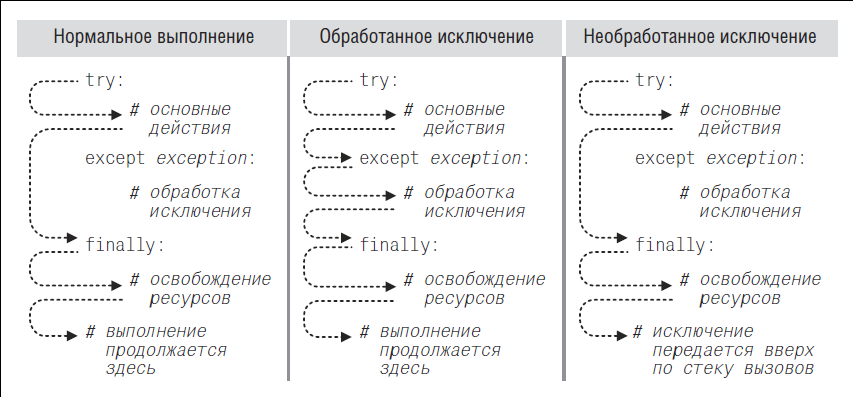

In [20]:
try:
    file = open('sdfasdf.txt', 'r')
except IOError as e:
    print(f'Было вызвано исключение IOError. {e.args[-1]}')
finally:
    print("Я буду напечатан вне зависимости от исключений в блоке try!")


Было вызвано исключение IOError. No such file or directory
Я буду напечатан вне зависимости от исключений в блоке try!


## else - try и еще немного

Если несколько выражений в try могут вызвать исключения и хочется отделить исключения одного от исключений другого, то можно или разбить его на несколько try-ecxept блоков, или (если исключения хочется обработать выше в стеке) написать else блок.

```python
try:
  do_some_stuff()
except:             # не указан тип? берем все исключения!
  rollback()
  raise             # генерируем повтороно последнее исключение
else:
  commit()
```

### Все вместе

In [21]:
try:
    print('Я уверен, исключений не будет!')
except Exception:
    print('Исключение')
else:
    # Любой код, который должен быть исполнен, если исключение в блоке
    # try не было вызвано, но для которого не должна проводиться
    # обработка исключений
    print('Я буду исполнен, если в try не будет исключений.'
          'Мои исключения не будут обрабатываться.')
finally:
    print('Я буду исполнен в любом случае!')

Я уверен, исключений не будет!
Я буду исполнен, если в try не будет исключений.Мои исключения не будут обрабатываться.
Я буду исполнен в любом случае!


Перерисовать, ибо потащено с https://realpython.com/python-exceptions/#the-else-clause

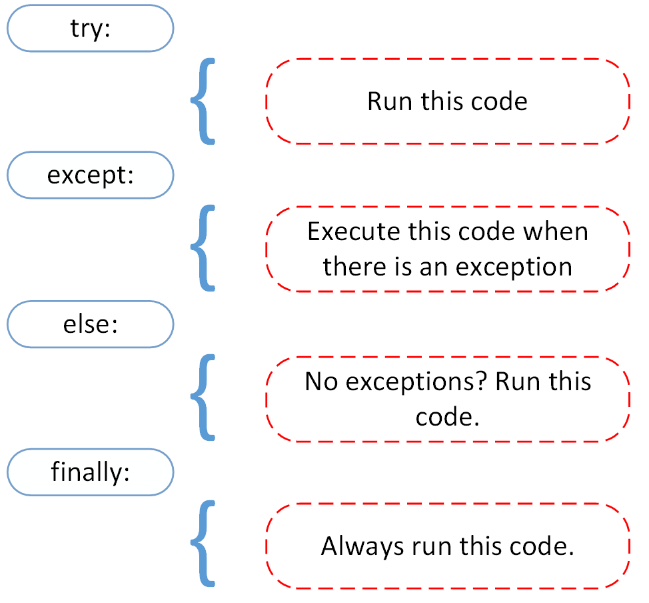

### Контрольный выстрел

Что вернет функция при следующих вызовах:

In [23]:
def foo(a):
    b = [1, 2, 3]
    x = 5 / a
    y = b[a]
    print(x, a, y)
    
def bzz(a):
    try:
        foo(a)
        print('try')
        return 1            # пока в try есть return, else не вызовется
    except:
        print('ecxept')
        return 2
    else:
        print('else')
        return 3
    finally:
        print('finally')
        return 4
    return 5

print(f'bzz({2})={bzz(2)}')
print(f'bzz({0})={bzz(0)}')
print(f'bzz({7})={bzz(7)}')

2.5 2 3
try
finally
bzz(2)=4
ecxept
finally
bzz(0)=4
ecxept
finally
bzz(7)=4


## Генерация исключений в Python

Для принудительной генерации исключения используется инструкция **raise**.

Самый простой пример работы с raise может выглядеть так.

In [25]:
try:
   raise Exception("Some exception")
except Exception as e:
   print(f"Exception exception: {e}")

Exception exception: Some exception


Таким образом, можно "вручную" вызывать исключения при необходимости.

Или перевызвать последнее исключение, вызвав **raise** без параметров.

## Информация в исключении

Обычно достаточно перехватить исключение и реагировать на сам факт его появления.

**args** - это кортеж составных частей исключения. В него можно добавить свою информацию.

In [27]:
d = [2, 4, 7, 11]
(a, b, c) = d

ValueError: too many values to unpack (expected 3)

Код
```python
(a,b,c) = d
```
может породить исключение
```python
ValueError: unpack list of wrong size
```

Сразу возникает вопрос - а что в переменной d, что не удалось его распаковать. Добавим значение переменной d в исключение и raise обновленное исключение.

```python
try:
  a, b, c = d
except Exception as e:
  e.args += (d,)
  raise
```


Иногда нужно логировать исключение или обрабатывать дополнительную информацию.

In [28]:
import traceback
import sys

def foo(a):
    x = 5 / a
    print(x, a)

try:    
    foo(5)
    foo(0)      # на 0 делить нельзя
    foo(7)
except ZeroDivisionError as e:                  # если e не нужно, то as e не пишем
    print('Поймали исключение!')
    print(e)                                    # печать 'division by zero'
    print('-'*60)
    traceback.print_exc(file=sys.stdout)        # печать stacktrace
    print('-'*60)
    
print('После блока обработки исключений')

1.0 5
Поймали исключение!
division by zero
------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\taty\AppData\Local\Temp\ipykernel_18096\3116522628.py", line 10, in <module>
    foo(0)      # на 0 делить нельзя
  File "C:\Users\taty\AppData\Local\Temp\ipykernel_18096\3116522628.py", line 5, in foo
    x = 5 / a
ZeroDivisionError: division by zero
------------------------------------------------------------
После блока обработки исключений


### Напечатать только сообщение исключения

**str(e)** - просто преобразуйте исключение к строке.

### Напечатать stacktrace исключения

[Документация](https://docs.python.org/3/library/traceback.html)

Используйте функцию **traceback.print_exc()**

### Тип, значение и traceback

Используйте функцию **sys.exc_info()**
 
```python
exc_type, exc_value, exc_traceback = sys.exc_info()
```

### Пример, как все это используется

In [30]:
import sys, traceback

def lumberjack():
    bright_side_of_death()

def bright_side_of_death():
    return tuple()[0]

try:
    lumberjack()
except IndexError:
    exc_type, exc_value, exc_traceback = sys.exc_info()
    
    print("*** print_tb:")
    traceback.print_tb(exc_traceback, limit=1, file=sys.stdout)
    
    print("*** print_exception:")
    # exc_type below is ignored on 3.5 and later
    traceback.print_exception(exc_type, exc_value, exc_traceback,
                              limit=2, file=sys.stdout)
                              
    print("*** print_exc:")
    traceback.print_exc(limit=2, file=sys.stdout)
    
    print("*** format_exc, first and last line:")
    formatted_lines = traceback.format_exc().splitlines()
    print(formatted_lines[0])
    print(formatted_lines[-1])
    
    print("*** format_exception:")
    # exc_type below is ignored on 3.5 and later
    print(repr(traceback.format_exception(exc_type, exc_value,
                                          exc_traceback)))
                                          
    print("*** extract_tb:")
    print(repr(traceback.extract_tb(exc_traceback)))
    print("*** format_tb:")
    print(repr(traceback.format_tb(exc_traceback)))
    print("*** tb_lineno:", exc_traceback.tb_lineno)

*** print_tb:
  File "C:\Users\taty\AppData\Local\Temp\ipykernel_18096\2363723994.py", line 10, in <module>
    lumberjack()
*** print_exception:
Traceback (most recent call last):
  File "C:\Users\taty\AppData\Local\Temp\ipykernel_18096\2363723994.py", line 10, in <module>
    lumberjack()
  File "C:\Users\taty\AppData\Local\Temp\ipykernel_18096\2363723994.py", line 4, in lumberjack
    bright_side_of_death()
IndexError: tuple index out of range
*** print_exc:
Traceback (most recent call last):
  File "C:\Users\taty\AppData\Local\Temp\ipykernel_18096\2363723994.py", line 10, in <module>
    lumberjack()
  File "C:\Users\taty\AppData\Local\Temp\ipykernel_18096\2363723994.py", line 4, in lumberjack
    bright_side_of_death()
IndexError: tuple index out of range
*** format_exc, first and last line:
Traceback (most recent call last):
IndexError: tuple index out of range
*** format_exception:
['Traceback (most recent call last):\n', '  File "C:\\Users\\taty\\AppData\\Local\\Temp\\ipykernel

# Чтение и запись в файл

Часто используемые операции над файлами:

| Операция | Интерпретация | 
|---|-----|
| output = open(r’C:\spam', 'w') | Открывает файл для записи | 
| input = open('data', 'r') | Открывает файл для чтения | 
| input = open('data') | То же самое, 'r' - по умолчанию | 
| aString = input.read() | Чтение файла целиком в единственную строку | 
| aString = input.read(N) | Чтение следующих N символов (или байтов) в строку | 
| aString = input.readline() | Чтение следующей текстовой строки (включая символ конца строки) в строку | 
| aList = input.readlines() | Чтение файла целиком в список строк (включая символ конца строки) | 
| output.write(aString) | Запись строки символов (или байтов) в файл | 
| output.writelines(aList) | Запись всех строк из списка в файл | 
| output.close() | Закрытие файла вручную (выполняется по окончании работы с файлом) | 
| output.flush() | Выталкивает выходные буферы на диск, файл остается открытым | 
| anyFile.seek(N) | Изменяет текущую позицию в файле для следующей операции, смещая ее на N байтов от начала файла. | 
| for line in open('data'):<br/>&nbsp;&nbsp;операции над line | Итерации по файлу, построчное чтение | 
| open('f.txt', encoding='utf-8') | Файлы с текстом (строки типа str) | 
| open('f.bin', 'rb') | Файлы с двоичными данными (строки типа bytes) | 

### Читаем файл построчно

Если файл текстовый, то это итерируемая (по строкам) величина:

In [33]:
with open('data/text.txt', encoding='utf-8') as fin:
    for line in fin:
        print(line, end='')

Маленькой елочке
Холодно зимой.
Из лесу елочку
Взяли мы домой.


In [34]:
# Отдельно читаем первую строку, потом остальные:
with open('data/text.txt', encoding='utf-8') as fin:
    line = next(fin)
    print('first line:', line)
    for line in fin:
        print(line, end='')

first line: Маленькой елочке

Холодно зимой.
Из лесу елочку
Взяли мы домой.


In [38]:
# Или с помощью метода `readline()`:
with open('data/text.txt', encoding='utf-8') as fin:
    line = fin.readline()
    print('first line:', line)
    
    while line:
        line = fin.readline()
        print(line, end='')

first line: Маленькой елочке

Холодно зимой.
Из лесу елочку
Взяли мы домой.


### Текст - список строк

Чтобы прочитать весь файл в список строк, используйте функцию `readlines` (-s говорит, что "много") или преобразуйте объект файл в список.

Не надо так делать, если файл занимает очень много места в памяти.

In [40]:
with open('data/text.txt', encoding='utf-8') as fin:
    text = fin.readlines()
print(text)

['Маленькой елочке\n', 'Холодно зимой.\n', 'Из лесу елочку\n', 'Взяли мы домой.\n']


In [41]:
with open('data/text.txt', encoding='utf-8') as fin:
    text = list(fin)
print(text)

['Маленькой елочке\n', 'Холодно зимой.\n', 'Из лесу елочку\n', 'Взяли мы домой.\n']


### Чтение бинарного потока

* Функция **read(size)** возвращает строку, если файл открывали в текстовой моде или байтовый объект (бинарная мода).

* Если `size` не указан или < 0, то пытается прочитаться весь файл. Забота о памяти - это ваша проблема, а не питона. Не читайте так большие файлы.

* Положительная `size` - размер буфера для чтения в байтах.

* Если файл закончился, `read` вернет пустую строку ''.

In [43]:
with open('data/text.txt', encoding='utf-8') as fin:
    s = fin.read(1)
    print(s)        # М
    s = fin.read()
    print(s)        # весь остальной текст

М
аленькой елочке
Холодно зимой.
Из лесу елочку
Взяли мы домой.



### Запись в файл print

```python
print('Hello', file=fin)
```

### Запись в файл write
```python
fin.write(b'Hello')     # b'Hello' - массив байт, не строка
```

### Чтение-запись текста как потока байтов

Не забывайте, что нужно кодировать и декодировать байты.

```python
with open('somefile.bin', 'rb') as f:
    data = f.read(16)
    text = data.decode('utf-8')

with open('somefile.bin', 'wb') as f:
    text = 'Hello World'
    f.write(text.encode('utf-8'))
```
